# Rahul Agrawal
## TC202

###   Model Building , Training And Testing On Titanic_Preprocessed dataset 




In [1]:
# Importing Libreries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn import preprocessing

import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('titanic_preprocessed.csv' )


In [3]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.000000,1,0,7.2500,0,0,1
1,1,1,1,38.000000,1,0,71.2833,1,0,0
2,1,3,1,26.000000,0,0,7.9250,0,0,1
3,1,1,1,35.000000,1,0,53.1000,0,0,1
4,0,3,0,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1
887,1,1,1,19.000000,0,0,30.0000,0,0,1
888,0,3,1,29.699118,1,2,23.4500,0,0,1
889,1,1,0,26.000000,0,0,30.0000,1,0,0


In [4]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [5]:
# spliting data into feature and label

df_feature= df.drop(['Survived'] , axis=1)
df_label= df['Survived']

###   columns that to be scaled in order to feed to model

In [6]:
for col in df:
    if(len(df[col].unique())<=2):   #get column name having more than 2 unique values 
        continue
    print(col)
#     print(df[col].unique())

Pclass
Age
SibSp
Parch
Fare


In [7]:
#  initialising scaler 
#  here using 2 scaling techniques  1]  MinMaxScaler  2] StanderdScaler

mmscaler = MinMaxScaler()
stdscaler =StandardScaler()


### Scaling the data

In [8]:
#  Fitting data on scaling techniques using fit_transform()

X_mm= mmscaler.fit_transform(df_feature)
X_std= stdscaler.fit_transform(df_feature)

In [9]:
X_mm=pd.DataFrame(X_mm)
X_mm.columns=[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_mm

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.271174,0.125,0.000000,0.014151,0.0,0.0,1.0
1,0.0,1.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,0.0,0.0,1.0
3,0.0,1.0,0.434531,0.125,0.000000,0.103644,0.0,0.0,1.0
4,1.0,0.0,0.434531,0.000,0.000000,0.015713,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,0.5,0.0,0.334004,0.000,0.000000,0.025374,0.0,0.0,1.0
887,0.0,1.0,0.233476,0.000,0.000000,0.058556,0.0,0.0,1.0
888,1.0,1.0,0.367921,0.125,0.333333,0.045771,0.0,0.0,1.0
889,0.0,0.0,0.321438,0.000,0.000000,0.058556,1.0,0.0,0.0


In [10]:
X_std=pd.DataFrame(X_std)
X_std.columns=[ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_std

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.502445,-0.482043,-0.307562,0.615838
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,0.786845,2.074505,-0.307562,-1.623803
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.488854,-0.482043,-0.307562,0.615838
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,0.420730,-0.482043,-0.307562,0.615838
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.486337,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.386671,-0.482043,-0.307562,0.615838
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.044381,-0.482043,-0.307562,0.615838
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.176263,-0.482043,-0.307562,0.615838
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,-0.044381,2.074505,-0.307562,-1.623803


In [11]:
#  defining target

y=df_label




In [12]:
#  Making test_train split 

Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_mm, y, test_size=0.2, random_state=1)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_std, y, test_size=0.2, random_state=1)

### Loading Logistic Regression Model 

In [13]:
#  Loading Logistic Regression model 2 times for both scaling techniques

lr_mm=LogisticRegression()
lr_std=LogisticRegression()

### Fitting data

In [14]:
#  fitting data 

lr_mm.fit(Xm_train,ym_train)
lr_std.fit(Xs_train,ys_train)

LogisticRegression()

In [15]:
#  predicting values for test data

ym_pred=lr_mm.predict(Xm_test)
ys_pred=lr_std.predict(Xs_test)

In [16]:
#    calcualting Error betn actaual data and prediceted data
error_mm = mean_squared_error(ym_test,ym_pred)
error_std = mean_squared_error(ys_test,ys_pred)

### Error calculation on unknown/test data

In [17]:
print("error for MinmaxScaler is : ",error_mm,"\n error for StanderdScaler is :",error_std)

error for MinmaxScaler is :  0.21787709497206703 
 error for StanderdScaler is : 0.19553072625698323


In [18]:
#  Scoring the model based on test data

print("Probability Accuracy for MinmaxScaled model is :",lr_mm.score(Xm_test,ys_test)*100 ,"%" ,
      " \nProbability Accuracy for StanderdScaled model is :",lr_std.score(Xs_test,ys_test)*100,"%")

Probability Accuracy for MinmaxScaled model is : 78.2122905027933 %  
Probability Accuracy for StanderdScaled model is : 80.44692737430168 %


 Confusion Matrix For MinmaxScaled Model


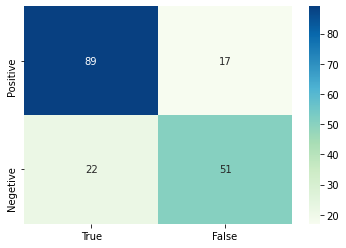

In [19]:
cm_mm=confusion_matrix(ym_test,ym_pred)  # for minmax
cm_std=confusion_matrix(ys_test,ys_pred)  # for stdscaled
x_axis_labels=['True','False']
y_axis_labels=['Positive','Negetive']
sns.heatmap(cm_mm , annot=True , cmap="GnBu" ,xticklabels=x_axis_labels, yticklabels=y_axis_labels )
print(" Confusion Matrix For MinmaxScaled Model")


 Confusion Matrix For For StanderdScaled Model


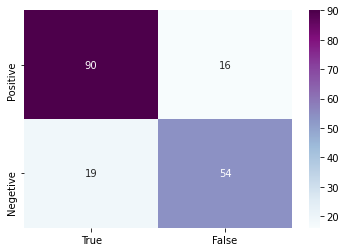

In [20]:
sns.heatmap(cm_std , annot=True , cmap="BuPu" ,xticklabels=x_axis_labels, yticklabels=y_axis_labels )
print(" Confusion Matrix For For StanderdScaled Model")

### Classification Report

In [21]:
print("Classification Report For standerdScaled Model\n :",classification_report(ys_test,ys_pred)
     ,"\n\n\nClassification Report For MinmaxScaled Model :\n\n",classification_report(ym_test,ym_pred))

Classification Report For standerdScaled Model
 :               precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.77      0.74      0.76        73

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179
 


Classification Report For MinmaxScaled Model :

               precision    recall  f1-score   support

           0       0.80      0.84      0.82       106
           1       0.75      0.70      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

